In [ ]:
#Observations:
#1) The size of tumors in rats tated with Capomulin declined by about 10mm over a 40 day period. However, for Infubinol
# and Ketapril the tumors coninued to grow at a similar rate to the placebo. 
#2) Only 3 mice died in the Capomulin group. The Infubinol and Ketapril groups had similar death totals (about 15 and 
#rates across 40 days as the placebo.
#3) Capomulin rates saw on average a 19% reduction in tumor size. The other three grous saw an increase of around 50%
#over a 40 day period. 

In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem 

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv (clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_trial_data = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer" )

# Display the data table for preview

mouse_trial_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [34]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Groupedvol = mouse_trial_data.groupby(["Drug","Timepoint"])
tumor_vol = Groupedvol["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
dftest = pd.DataFrame({
    "Average Tumor Volume": tumor_vol 
}).reset_index()

# Preview DataFrame
dftest.head()

,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
Groupedvol = mouse_trial_data.groupby(["Drug","Timepoint"])
tumor_vol_se = Groupedvol["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_vol_se_df = pd.DataFrame({
    "Tumor Volume Standard Error": tumor_vol_se 
}).reset_index()

# Preview DataFrame
tumor_vol_se_df.head()

,Drug,Timepoint,Tumor Volume Standard Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [36]:
Capomulin = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Capomulin"]
Ceftamin = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Ceftamin"]
Infubinol = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Infubinol"]
Ketapril = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Ketapril"]
Naftisol = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Naftisol"]
Placebo = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Placebo"]
Propriva = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Propriva"]
Ramicane = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Ramicane"]
Stelasyn = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Stelasyn"]
Zoniferol = mouse_trial_data.loc[mouse_trial_data["Drug"]== "Zoniferol"]

Capomulin_mean = Capomulin.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Ceftamin_mean = Ceftamin.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Infubinol_mean = Infubinol.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Ketapril_mean = Ketapril.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Placebo_mean = Placebo.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Propriva_mean = Propriva.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Ramicane_mean = Ramicane.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Stelasyn_mean = Stelasyn.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
Zoniferol_mean = Zoniferol.groupby("Timepoint")["Tumor Volume (mm3)"].mean()

vol_mean_by_drug = pd.DataFrame({
    "Capomulin": Capomulin_mean,
    "Ceftamin": Ceftamin_mean,
    "Infubinol": Infubinol_mean,  
    "Ketapril": Ketapril_mean,  
    "Placebo": Placebo_mean, 
    "Propriva": Propriva_mean,   
    "Ramicane": Ramicane_mean,  
    "Stelasyn": Stelasyn_mean,  
    "Zoniferol": Zoniferol_mean 
})

Capomulin_se = Capomulin.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Ceftamin_se = Ceftamin.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Infubinol_se = Infubinol.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Ketapril_se = Ketapril.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Placebo_se = Placebo.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Propriva_se = Propriva.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Ramicane_se = Ramicane.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Stelasyn_se = Stelasyn.groupby("Timepoint")["Tumor Volume (mm3)"].sem()
Zoniferol_se = Zoniferol.groupby("Timepoint")["Tumor Volume (mm3)"].sem()

vol_se_by_drug = pd.DataFrame({
    "Capomulin": Capomulin_se,
    "Ceftamin": Ceftamin_se,
    "Infubinol": Infubinol_se,  
    "Ketapril": Ketapril_se,  
    "Placebo": Placebo_se, 
    "Propriva": Propriva_se,   
    "Ramicane": Ramicane_se,  
    "Stelasyn": Stelasyn_se,  
    "Zoniferol": Zoniferol_se 
})

vol_mean_by_drug.head()

# Preview that Reformatting worked

,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,54.364417,53.346737,40.238325,54.067395,53.170334


In [37]:
yes = mouse_trial_data["Timepoint"].unique()
no = mouse_trial_data["Drug"].unique()
Drug = no

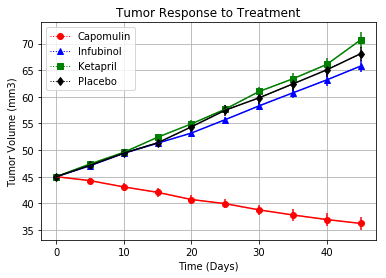

In [40]:
# Generate the Plot (with Error Bars)
Timepoint = yes
drug_mean_capomulin = vol_mean_by_drug["Capomulin"]
drug_mean_infubinol = vol_mean_by_drug["Infubinol"]
drug_mean_ketapril = vol_mean_by_drug["Ketapril"]
drug_mean_placebo = vol_mean_by_drug["Placebo"]

plt.plot(Timepoint, drug_mean_capomulin, ":", linewidth=1, marker="o", color="red")
plt.plot(Timepoint, drug_mean_infubinol, ":", linewidth=1, marker="^", color="blue")
plt.plot(Timepoint, drug_mean_ketapril, ":", linewidth=1, marker="s", color="green")
plt.plot(Timepoint, drug_mean_placebo, ":", linewidth=1, marker="d", color="black")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="upper left")
plt.errorbar(Timepoint, drug_mean_capomulin, yerr=Capomulin_se, color="red")
plt.errorbar(Timepoint, drug_mean_infubinol, yerr=Infubinol_se, color="blue")
plt.errorbar(Timepoint, drug_mean_ketapril, yerr=Ketapril_se, color="green")
plt.errorbar(Timepoint, drug_mean_placebo, yerr=Placebo_se, color="black")

# Show the Figure
plt.show()
plt.savefig("Tumor_Response_Plot.png")

## Metastatic Response to Treatment

In [41]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_met = mouse_trial_data.groupby(["Drug","Timepoint"])

met_mean = grouped_met["Metastatic Sites"].mean()
# Convert to DataFrame
df_met = pd.DataFrame({
    "Average Metastatic Sites": met_mean 
}) 

# Preview DataFrame
df_met.head()

Average Metastatic Sites
Drug      Timepoint                          
Capomulin 0                          0.000000
          5                          0.160000
          10                         0.320000
          15                         0.375000
          20                         0.652174

In [42]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
grouped_met_se = mouse_trial_data.groupby(["Drug","Timepoint"])

met_se = grouped_met_se["Metastatic Sites"].sem()

# Convert to DataFrame
df_met_se = pd.DataFrame({
    "Standard Error Metastatic Sites": met_se 
}) 

# Preview DataFrame
df_met_se.head()

Standard Error Metastatic Sites
Drug      Timepoint                                 
Capomulin 0                                 0.000000
          5                                 0.074833
          10                                0.125433
          15                                0.132048
          20                                0.161621

In [43]:
Capomulin_met_mean = Capomulin.groupby("Timepoint")["Metastatic Sites"].mean()
Ceftamin_met_mean = Ceftamin.groupby("Timepoint")["Metastatic Sites"].mean()
Infubinol_met_mean = Infubinol.groupby("Timepoint")["Metastatic Sites"].mean()
Ketapril_met_mean = Ketapril.groupby("Timepoint")["Metastatic Sites"].mean()
Placebo_met_mean = Placebo.groupby("Timepoint")["Metastatic Sites"].mean()
Propriva_met_mean = Propriva.groupby("Timepoint")["Metastatic Sites"].mean()
Ramicane_met_mean = Ramicane.groupby("Timepoint")["Metastatic Sites"].mean()
Stelasyn_met_mean = Stelasyn.groupby("Timepoint")["Metastatic Sites"].mean()
Zoniferol_met_mean = Zoniferol.groupby("Timepoint")["Metastatic Sites"].mean()

met_mean_by_drug = pd.DataFrame({
    "Capomulin": Capomulin_met_mean,
    "Ceftamin": Ceftamin_met_mean,
    "Infubinol": Infubinol_met_mean,  
    "Ketapril": Ketapril_met_mean,  
    "Placebo": Placebo_met_mean, 
    "Propriva": Propriva_met_mean,   
    "Ramicane": Ramicane_met_mean,  
    "Stelasyn": Stelasyn_met_mean,  
    "Zoniferol": Zoniferol_met_mean 
})

Capomulin_met_se = Capomulin.groupby("Timepoint")["Metastatic Sites"].sem()
Ceftamin_met_se = Ceftamin.groupby("Timepoint")["Metastatic Sites"].sem()
Infubinol_met_se = Infubinol.groupby("Timepoint")["Metastatic Sites"].sem()
Ketapril_met_se = Ketapril.groupby("Timepoint")["Metastatic Sites"].sem()
Placebo_met_se = Placebo.groupby("Timepoint")["Metastatic Sites"].sem()
Propriva_met_se = Propriva.groupby("Timepoint")["Metastatic Sites"].sem()
Ramicane_met_se = Ramicane.groupby("Timepoint")["Metastatic Sites"].sem()
Stelasyn_met_se = Stelasyn.groupby("Timepoint")["Metastatic Sites"].sem()
Zoniferol_met_se = Zoniferol.groupby("Timepoint")["Metastatic Sites"].sem()

met_se_by_drug = pd.DataFrame({
    "Capomulin": Capomulin_met_se,
    "Ceftamin": Ceftamin_met_se,
    "Infubinol": Infubinol_met_se,  
    "Ketapril": Ketapril_met_se,  
    "Placebo": Placebo_met_se, 
    "Propriva": Propriva_met_se,   
    "Ramicane": Ramicane_met_se,  
    "Stelasyn": Stelasyn_met_se,  
    "Zoniferol": Zoniferol_met_se 
})

met_mean_by_drug.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.526316,1.000000,0.347826,0.952381,1.294118


In [44]:
met_se_by_drug.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.234064,0.171499,0.119430,0.200905,0.166378


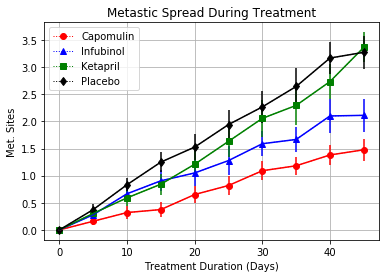

In [46]:
# Generate the Plot (with Error Bars)
met_mean_capomulin = met_mean_by_drug["Capomulin"]
met_mean_infubinol = met_mean_by_drug["Infubinol"]
met_mean_ketapril = met_mean_by_drug["Ketapril"]
met_mean_placebo = met_mean_by_drug["Placebo"]

plt.plot(Timepoint, met_mean_capomulin, ':', linewidth=1, marker="o", color="red")
plt.plot(Timepoint, met_mean_infubinol, ':', linewidth=1, marker="^", color="blue")
plt.plot(Timepoint, met_mean_ketapril, ':', linewidth=1, marker="s", color="green")
plt.plot(Timepoint, met_mean_placebo, ':', linewidth=1, marker="d", color="black")

plt.title("Metastic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
plt.legend(loc="upper left")

plt.errorbar(Timepoint, met_mean_capomulin, yerr=Capomulin_met_se, color="red")
plt.errorbar(Timepoint, met_mean_infubinol, yerr=Infubinol_met_se, color="blue")
plt.errorbar(Timepoint, met_mean_ketapril, yerr=Ketapril_met_se, color="green")
plt.errorbar(Timepoint, met_mean_placebo, yerr=Placebo_met_se, color="black")

plt.show()
plt.savefig("Met_Spread_Plot.png")

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = Groupedvol["Mouse ID"].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame({
    "Mice Count": mice_count
}).reset_index()
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
Capomulin_count = Capomulin.groupby("Timepoint")["Mouse ID"].count()
Ceftamin_count = Ceftamin.groupby("Timepoint")["Mouse ID"].count()
Infubinol_count = Infubinol.groupby("Timepoint")["Mouse ID"].count()
Ketapril_count = Ketapril.groupby("Timepoint")["Mouse ID"].count()
Placebo_count = Placebo.groupby("Timepoint")["Mouse ID"].count()
Propriva_count = Propriva.groupby("Timepoint")["Mouse ID"].count()
Ramicane_count = Ramicane.groupby("Timepoint")["Mouse ID"].count()
Stelasyn_count = Stelasyn.groupby("Timepoint")["Mouse ID"].count()
Zoniferol_count = Zoniferol.groupby("Timepoint")["Mouse ID"].count()

mice_by_drug = pd.DataFrame({
    "Capomulin": Capomulin_count,
    "Ceftamin": Ceftamin_count,
    "Infubinol": Infubinol_count,  
    "Ketapril": Ketapril_count,  
    "Placebo": Placebo_count, 
    "Propriva": Propriva_count,   
    "Ramicane": Ramicane_count,  
    "Stelasyn": Stelasyn_count,  
    "Zoniferol": Zoniferol_count 
})

mice_by_drug.head()

,Capomulin,Ceftamin,Infubinol,Ketapril,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,
0,25,25,25,25,25,26,25,26,25
5,25,21,25,23,24,25,25,25,24
10,25,20,21,22,24,23,24,23,22
15,24,19,21,19,20,17,24,23,21
20,23,18,20,19,19,17,23,21,17


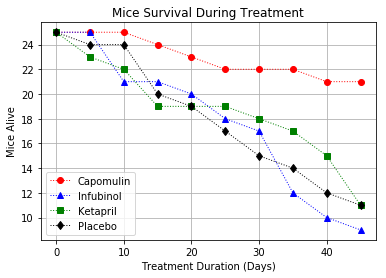

In [47]:
# Generate the Plot (Accounting for percentages)
mice_mean_capomulin = mice_by_drug["Capomulin"]
mice_mean_infubinol = mice_by_drug["Infubinol"]
mice_mean_ketapril = mice_by_drug["Ketapril"]
mice_mean_placebo = mice_by_drug["Placebo"]

plt.plot(Timepoint, mice_mean_capomulin, ":", linewidth=1, marker="o", color="red")
plt.plot(Timepoint, mice_mean_infubinol, ":", linewidth=1, marker="^", color="blue")
plt.plot(Timepoint, mice_mean_ketapril, ":", linewidth=1, marker="s", color="green")
plt.plot(Timepoint, mice_mean_placebo, ":", linewidth=1, marker="d", color="black")

plt.title("Mice Survival During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Mice Alive")
plt.grid()
plt.legend(loc="lower left")

plt.show()
plt.savefig("Mice.png")

## Summary Bar Graph

In [48]:
# Calculate the percent changes for each drug
per_change = vol_mean_by_drug.iloc[0, :] 
per= vol_mean_by_drug.iloc[9, :]

j= per/ per_change
v = (1 - j) * -100
# Display the data to confirm
percent_changes = pd.DataFrame({
    "% Change": v
})
# cap = v["Capomulin"]
# inf= v["Infubinol"],  
# ket= v["Ketapril"],  
# pla= v["Placebo"]
# vv = [cap, inf, ket, pla]
Sux =[]
fail=[]
vv=np.array([v["Capomulin"], v["Infubinol"],v["Placebo"],v["Ketapril"]])
for b in vv:
    if b > 0.0:
        Sux.append(b)
    else:
        fail.append(b)

x_axis = np.arange(len(vv))

print(Sux)
print(fail)
percent_changes

[46.123471727851872, 51.297960483151513, 57.028794686606062]
[-19.475302667894169]


,% Change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


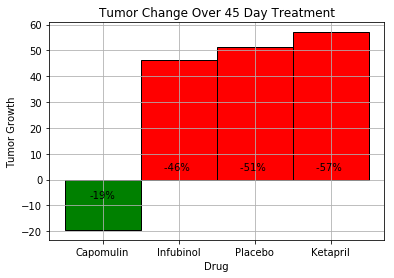

In [17]:

fig, ax = plt.subplots()



# Use functions to label the percentages of changes
def autolabelFail(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -8,
               '%d%%' % int(height),
               ha='center', va='bottom', color="black")

def autolabelPass(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 3,'-%d%% ' % int(height),
               ha='center', va='bottom', color="black")

Fails= ax.bar(0, fail, width=1, color='g', edgecolor= "black")
Passes= ax.bar([1,2,3], Sux, width=1, color='r', edgecolor = "black")
ax.grid(True)
# Call functions to implement the function calls
autolabelPass(Passes)
autolabelFail(Fails)


plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Placebo", "Ketapril"])
plt.ylabel("Tumor Growth")
plt.legend(loc="lower left")
plt.grid(1)

# Show the Figure
fig.show()

#  plt.text(....)
fig.savefig("Tumor_Change_Plot.png")